# Linear Regression (1 Feature)

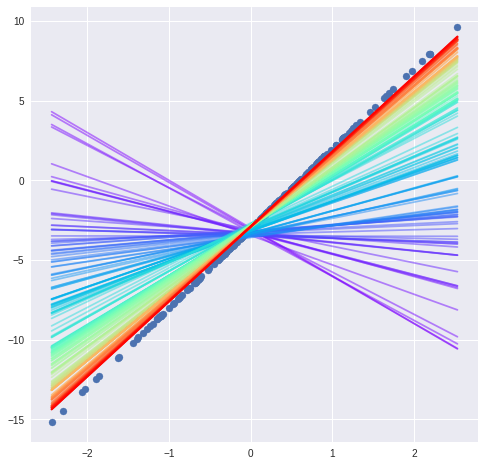

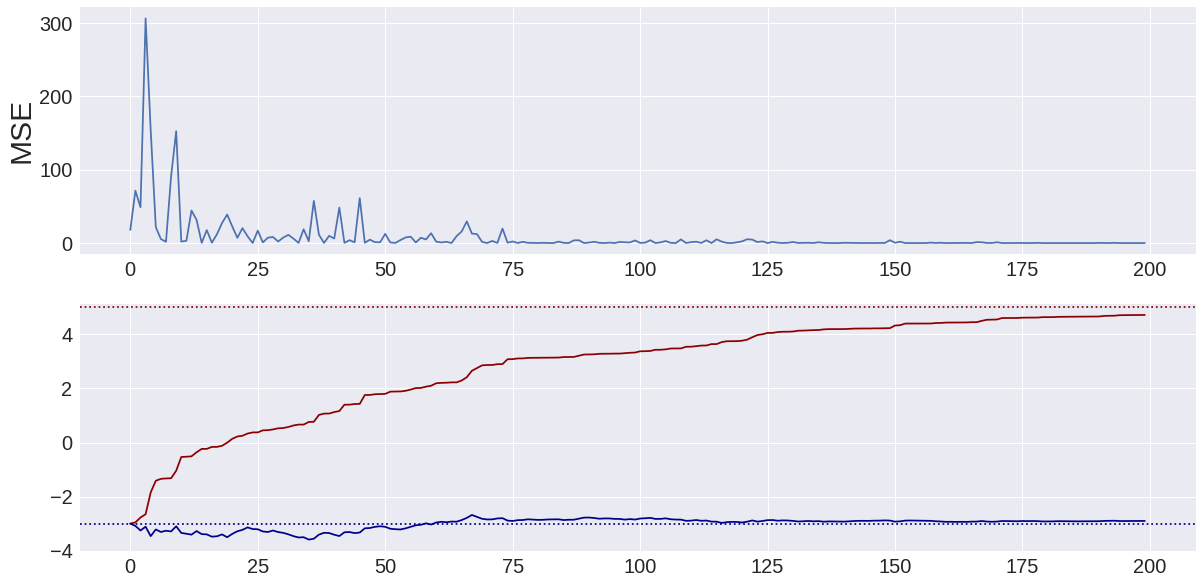

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N = 200
lr = 0.01
t_w, t_b = 5, -3   # feature가 1개이므로 w,b도 1개
w, b = np.random.uniform(-3,-3, 2)

# generate dataset
x_data = np.random.randn(N, )
y_data = x_data*t_w + t_b
# y_data += 0.5*np.random.randn(N, )  # noise를 섞는 경우


# visualize dataset
cmap = cm.get_cmap('rainbow', lut=N)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()
# train model and visualize updated models
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
  w_track.append(w)
  b_track.append(b)

  # visualize updated model
  y_range = w*x_range + b
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)

  # forward propagation
  pred = x*w + b
  J = (y - pred)**2
  J_track.append(J)

  # jacobians
  dJ_dpred = -2*(y - pred)
  dpred_dw = x
  dpred_db = 1

  # backpropagation
  dJ_dw = dJ_dpred * dpred_dw
  dJ_db = dJ_dpred * dpred_db

  # parameter update
  w = w - lr*dJ_dw
  b = b - lr*dJ_db

# visualize results
fig, axes = plt.subplots(2,1, figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(w_track, color='darkred')
axes[1].plot(b_track, color='darkblue')

axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].tick_params(labelsize=20)

# Linear Regression (n Feature)

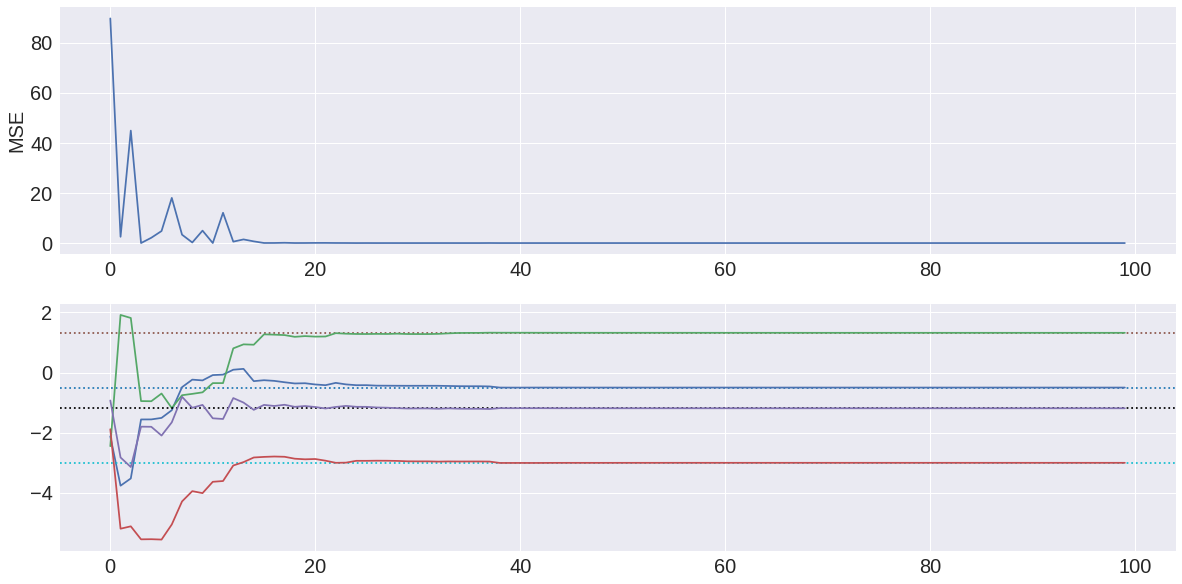

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 100, 3
lr = 0.1
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b

J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
  W_track.append(W)
  b_track.append(b)

  # forward propagation
  pred = X @ W + b
  J = (y - pred)**2
  J_track.append(J)

  # jacobians
  dJ_dpred = -2*(y - pred)
  dpred_dW = X.reshape(1, -1)
  dpred_db = 1

  # backpropagation
  dJ_dW = dJ_dpred * dpred_dW
  dJ_db = dJ_dpred * dpred_db

  # parameter update
  W = W - lr*dJ_dW.T
  b = b - lr*dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)


# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=20)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('tab10', lut= n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
  axes[1].plot(w)

axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track)
axes[1].tick_params(labelsize=20)